<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\cwtnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [3]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [4]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [6]:
import torch
import torch.nn as nn
from timm.layers import DropPath, to_2tuple, trunc_normal_

class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

def window_partition(x, window_size):
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows

def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)
    return x

class WindowAttention(nn.Module):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))

        coords_h = torch.arange(self.window_size[0])
        coords_w = torch.arange(self.window_size[1])
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))
        coords_flatten = torch.flatten(coords, 1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.relative_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask=None):
        B_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        relative_position_bias = self.relative_position_bias_table[self.relative_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1], self.window_size[0] * self.window_size[1], -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)

        if mask is not None:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class SwinTransformerBlock(nn.Module):
    def __init__(self, dim, input_resolution, num_heads, window_size=7, shift_size=0,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        if min(self.input_resolution) <= self.window_size:
            self.shift_size = 0
            self.window_size = min(self.input_resolution)
        assert 0 <= self.shift_size < self.window_size, "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(self.window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        if self.shift_size > 0:
            H, W = self.input_resolution
            img_mask = torch.zeros((1, H, W, 1))
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            cnt = 0
            for h in h_slices:
                for w in w_slices:
                    img_mask[:, h, w, :] = cnt
                    cnt += 1

            mask_windows = window_partition(img_mask, self.window_size)
            mask_windows = mask_windows.view(-1, self.window_size * self.window_size)
            attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
            attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, H, W, C)

        if self.shift_size > 0:
            shifted_x = torch.roll(x, shifts=(-self.shift_size, -self.shift_size), dims=(1, 2))
            x_windows = window_partition(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = window_partition(shifted_x, self.window_size)

        x_windows = x_windows.view(-1, self.window_size * self.window_size, C)
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = attn_windows.view(-1, self.window_size, self.window_size, C)

        if self.shift_size > 0:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = torch.roll(shifted_x, shifts=(self.shift_size, self.shift_size), dims=(1, 2))
        else:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = shifted_x
            
        x = x.view(B, H * W, C)
        x = shortcut + self.drop_path(x)
        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x

class PatchMerging(nn.Module):
    def __init__(self, input_resolution, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"
        assert H % 2 == 0 and W % 2 == 0, f"x size ({H}*{W}) are not even."

        x = x.view(B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3], -1)
        x = x.view(B, -1, 4 * C)

        x = self.norm(x)
        x = self.reduction(x)

        return x

class BasicLayer(nn.Module):
    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            SwinTransformerBlock(dim=dim, input_resolution=input_resolution,
                                 num_heads=num_heads, window_size=window_size,
                                 shift_size=0 if (i % 2 == 0) else window_size // 2,
                                 mlp_ratio=mlp_ratio,
                                 qkv_bias=qkv_bias, qk_scale=qk_scale,
                                 drop=drop, attn_drop=attn_drop,
                                 drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                                 norm_layer=norm_layer)
            for i in range(depth)])

        if downsample is not None:
            self.downsample = downsample(input_resolution, dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        if self.downsample is not None:
            x = self.downsample(x)
        return x

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = norm_layer(embed_dim) if norm_layer else None

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        if self.norm is not None:
            x = self.norm(x)
        return x

class SwinTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, num_classes=1000,
                 embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True, **kwargs):
        super().__init__()

        self.num_classes = num_classes
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.ape = ape
        self.patch_norm = patch_norm
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))
        self.mlp_ratio = mlp_ratio

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)
        num_patches = self.patch_embed.num_patches
        patches_resolution = self.patch_embed.patches_resolution
        self.patches_resolution = patches_resolution

        if self.ape:
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)

        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]

        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = BasicLayer(dim=int(embed_dim * 2 ** i_layer),
                               input_resolution=(patches_resolution[0] // (2 ** i_layer),
                                                patches_resolution[1] // (2 ** i_layer)),
                               depth=depths[i_layer],
                               num_heads=num_heads[i_layer],
                               window_size=window_size,
                               mlp_ratio=self.mlp_ratio,
                               qkv_bias=qkv_bias, qk_scale=qk_scale,
                               drop=drop_rate, attn_drop=attn_drop_rate,
                               drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],
                               norm_layer=norm_layer,
                               downsample=PatchMerging if (i_layer < self.num_layers - 1) else None)
            self.layers.append(layer)

        self.norm = norm_layer(self.num_features)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward_features(self, x):
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x)

        x = self.norm(x)
        x = self.avgpool(x.transpose(1, 2))
        x = torch.flatten(x, 1)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [7]:
randomdata = torch.randn((1,3,224,224))
tempmodel = SwinTransformer(num_classes=3)
op = tempmodel(randomdata)
op.shape

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4312.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 3])

In [8]:
from torchinfo import summary

summary(tempmodel)

Layer (type:depth-idx)                             Param #
SwinTransformer                                    --
├─PatchEmbed: 1-1                                  --
│    └─Conv2d: 2-1                                 4,704
│    └─LayerNorm: 2-2                              192
├─Dropout: 1-2                                     --
├─ModuleList: 1-3                                  --
│    └─BasicLayer: 2-3                             --
│    │    └─ModuleList: 3-1                        224,694
│    │    └─PatchMerging: 3-2                      74,496
│    └─BasicLayer: 2-4                             --
│    │    └─ModuleList: 3-3                        891,756
│    │    └─PatchMerging: 3-4                      296,448
│    └─BasicLayer: 2-5                             --
│    │    └─ModuleList: 3-5                        10,658,952
│    │    └─PatchMerging: 3-6                      1,182,720
│    └─BasicLayer: 2-6                             --
│    │    └─ModuleList: 3-7            

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


PARAMETER SET 1/5
Fold No: 1
Epoch [1/100], Loss: 1.1933, Accuracy: 0.3405
Validation Loss: 0.9784, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1333, Accuracy: 0.3729
Validation Loss: 1.0350, Validation Accuracy: 0.3390
Epoch [3/100], Loss: 1.1283, Accuracy: 0.3666
Validation Loss: 1.1012, Validation Accuracy: 0.3846
Epoch [4/100], Loss: 1.1089, Accuracy: 0.3769
Validation Loss: 1.0905, Validation Accuracy: 0.3797
Epoch [5/100], Loss: 1.0990, Accuracy: 0.3903
Validation Loss: 1.1173, Validation Accuracy: 0.4489
Epoch [6/100], Loss: 1.0932, Accuracy: 0.3951
Validation Loss: 1.0730, Validation Accuracy: 0.4559
Epoch [7/100], Loss: 1.0823, Accuracy: 0.4299
Validation Loss: 1.0817, Validation Accuracy: 0.4027
Epoch [8/100], Loss: 1.0831, Accuracy: 0.4276
Validation Loss: 1.0236, Validation Accuracy: 0.4276
Epoch [9/100], Loss: 1.0836, Accuracy: 0.4220
Validation Loss: 1.1296, Validation Accuracy: 0.4638
Epoch [10/100], Loss: 1.0623, Accuracy: 0.4561
Validation Loss: 1.0929, Validat

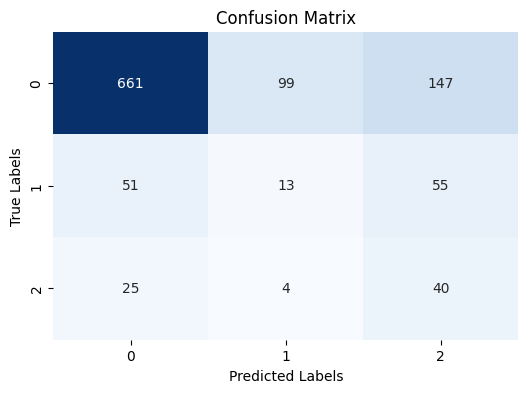


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 661/907 (72.88%)
Class 1: Correct Predictions / Total True Samples = 13/119 (10.92%)
Class 2: Correct Predictions / Total True Samples = 40/69 (57.97%)

Precision-Recall Curves:


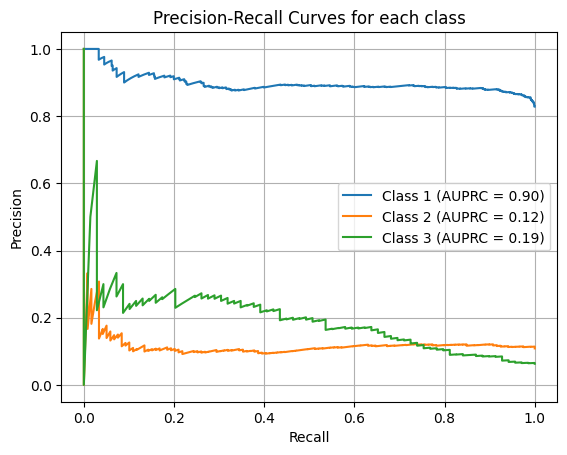


ROC Curves:


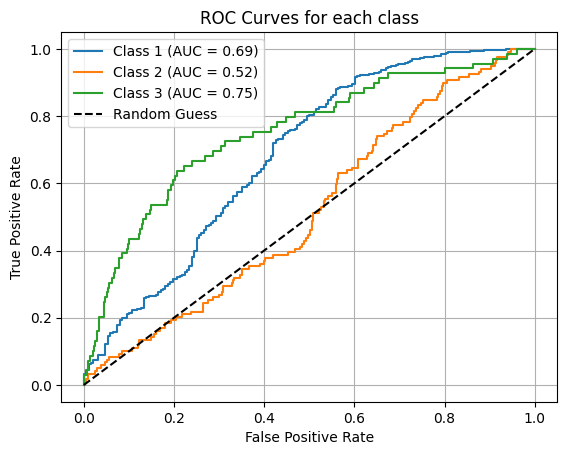


Mean F1 Score: 0.3907
Balanced Accuracy: 0.4726
Average AUPRC: 0.4002

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80       907
           1       0.11      0.11      0.11       119
           2       0.17      0.58      0.26        69

    accuracy                           0.65      1095
   macro avg       0.39      0.47      0.39      1095
weighted avg       0.77      0.65      0.69      1095

Fold No: 2
Epoch [1/100], Loss: 1.1621, Accuracy: 0.3560
Validation Loss: 1.0330, Validation Accuracy: 0.3795
Epoch [2/100], Loss: 1.1388, Accuracy: 0.3528
Validation Loss: 1.1768, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1133, Accuracy: 0.3958
Validation Loss: 1.0704, Validation Accuracy: 0.4318
Epoch [4/100], Loss: 1.0970, Accuracy: 0.4052
Validation Loss: 1.0082, Validation Accuracy: 0.4134
Epoch [5/100], Loss: 1.0946, Accuracy: 0.4059
Validation Loss: 1.0200, Validation Accuracy: 0.3860
Epoch [6/100], Los

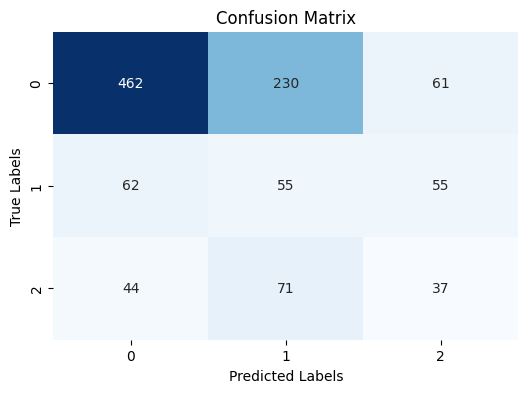


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 462/753 (61.35%)
Class 1: Correct Predictions / Total True Samples = 55/172 (31.98%)
Class 2: Correct Predictions / Total True Samples = 37/152 (24.34%)

Precision-Recall Curves:


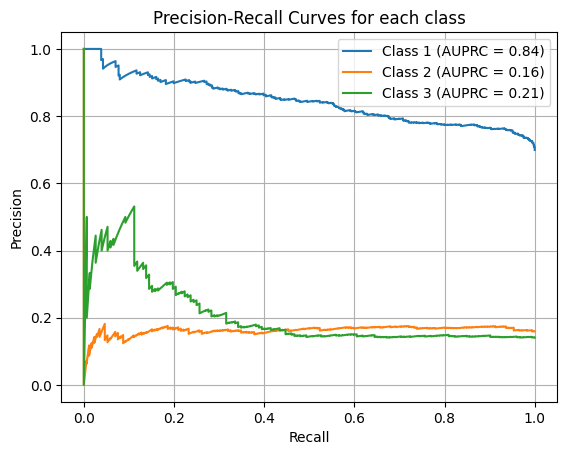


ROC Curves:


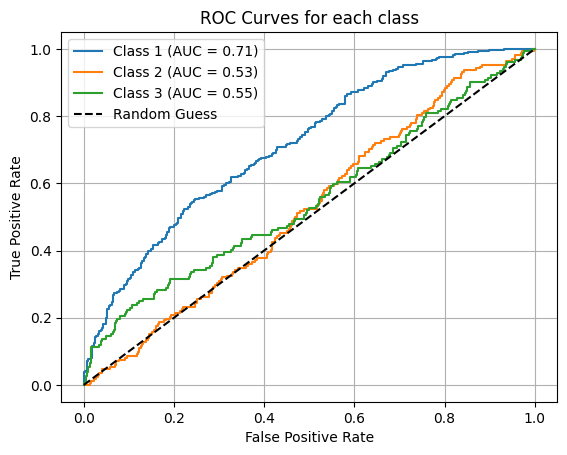


Mean F1 Score: 0.3835
Balanced Accuracy: 0.3922
Average AUPRC: 0.4037

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.70       753
           1       0.15      0.32      0.21       172
           2       0.24      0.24      0.24       152

    accuracy                           0.51      1077
   macro avg       0.40      0.39      0.38      1077
weighted avg       0.63      0.51      0.56      1077

Fold No: 3
Epoch [1/100], Loss: 1.2085, Accuracy: 0.3420
Validation Loss: 0.9599, Validation Accuracy: 0.3232
Epoch [2/100], Loss: 1.1360, Accuracy: 0.3854
Validation Loss: 1.2253, Validation Accuracy: 0.3937
Epoch [3/100], Loss: 1.1147, Accuracy: 0.3921
Validation Loss: 1.3451, Validation Accuracy: 0.3183
Epoch [4/100], Loss: 1.0933, Accuracy: 0.4268
Validation Loss: 1.0375, Validation Accuracy: 0.4163
Epoch [5/100], Loss: 1.0796, Accuracy: 0.4277
Validation Loss: 1.1987, Validation Accuracy: 0.3563
Epoch [6/100], Los

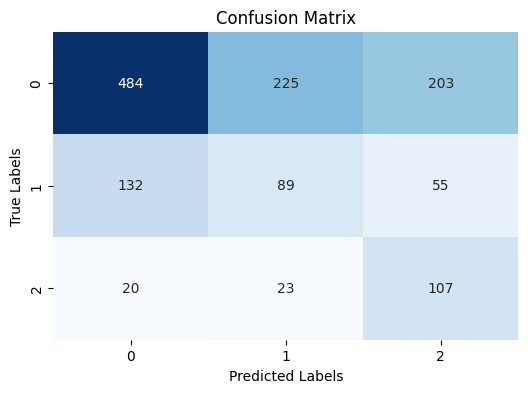


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 484/912 (53.07%)
Class 1: Correct Predictions / Total True Samples = 89/276 (32.25%)
Class 2: Correct Predictions / Total True Samples = 107/150 (71.33%)

Precision-Recall Curves:


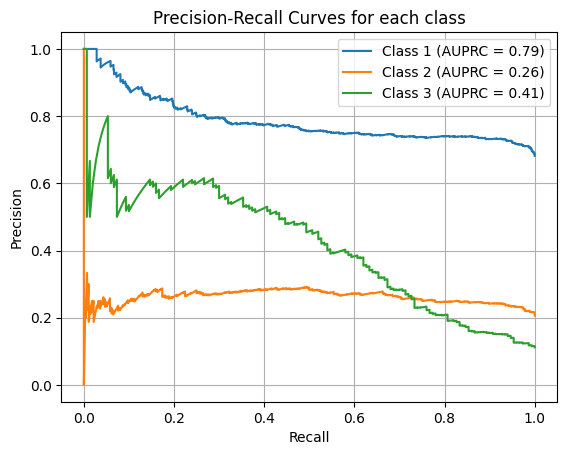


ROC Curves:


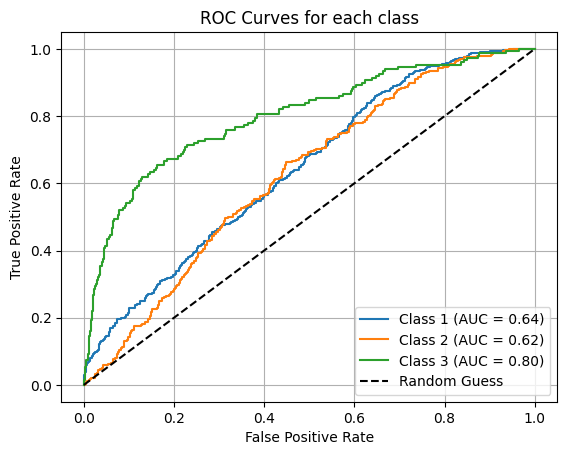


Mean F1 Score: 0.4437
Balanced Accuracy: 0.5222
Average AUPRC: 0.4874

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       912
           1       0.26      0.32      0.29       276
           2       0.29      0.71      0.42       150

    accuracy                           0.51      1338
   macro avg       0.44      0.52      0.44      1338
weighted avg       0.61      0.51      0.53      1338

Fold No: 4
Epoch [1/100], Loss: 1.2054, Accuracy: 0.3412
Validation Loss: 1.0833, Validation Accuracy: 0.4273
Epoch [2/100], Loss: 1.1492, Accuracy: 0.3131
Validation Loss: 1.1560, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1482, Accuracy: 0.3175
Validation Loss: 1.2490, Validation Accuracy: 0.3333
Epoch [4/100], Loss: 1.1246, Accuracy: 0.3588
Validation Loss: 1.2742, Validation Accuracy: 0.4822
Epoch [5/100], Loss: 1.1204, Accuracy: 0.3527
Validation Loss: 1.0756, Validation Accuracy: 0.4406
Epoch [6/100], Los

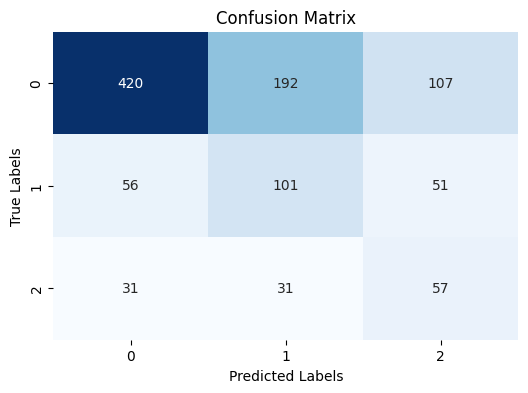


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 420/719 (58.41%)
Class 1: Correct Predictions / Total True Samples = 101/208 (48.56%)
Class 2: Correct Predictions / Total True Samples = 57/119 (47.90%)

Precision-Recall Curves:


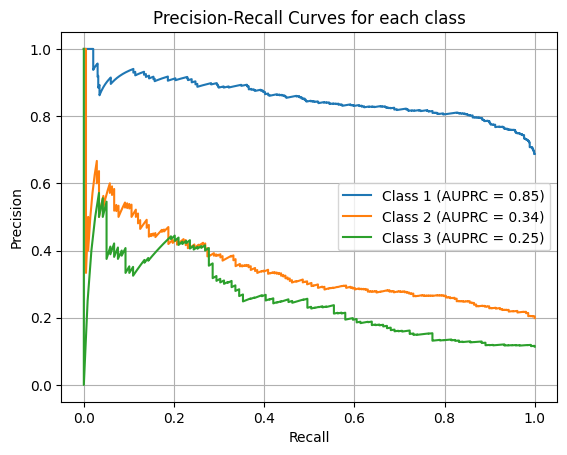


ROC Curves:


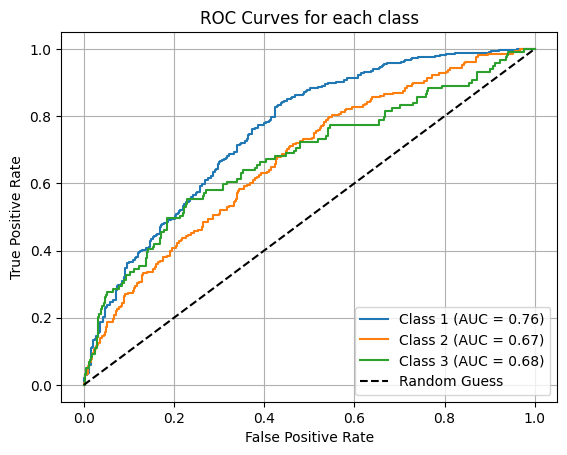


Mean F1 Score: 0.4687
Balanced Accuracy: 0.5162
Average AUPRC: 0.4821

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.58      0.69       719
           1       0.31      0.49      0.38       208
           2       0.27      0.48      0.34       119

    accuracy                           0.55      1046
   macro avg       0.47      0.52      0.47      1046
weighted avg       0.66      0.55      0.59      1046

Fold No: 5
Epoch [1/100], Loss: 1.1779, Accuracy: 0.3468
Validation Loss: 1.0736, Validation Accuracy: 0.3710
Epoch [2/100], Loss: 1.1502, Accuracy: 0.3468
Validation Loss: 1.0464, Validation Accuracy: 0.3595
Epoch [3/100], Loss: 1.1384, Accuracy: 0.3333
Validation Loss: 1.1720, Validation Accuracy: 0.3523
Epoch [4/100], Loss: 1.1229, Accuracy: 0.3441
Validation Loss: 1.2837, Validation Accuracy: 0.3684
Epoch [5/100], Loss: 1.1150, Accuracy: 0.3720
Validation Loss: 1.1744, Validation Accuracy: 0.3829
Epoch [6/100], Los

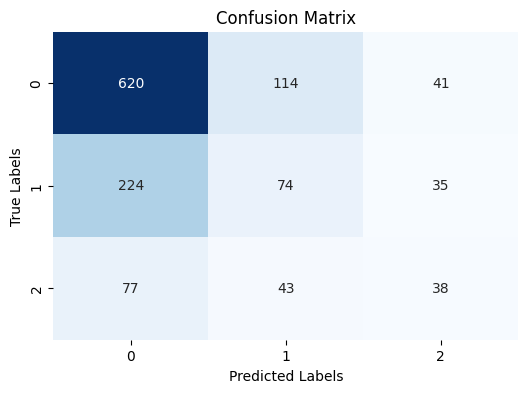


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 620/775 (80.00%)
Class 1: Correct Predictions / Total True Samples = 74/333 (22.22%)
Class 2: Correct Predictions / Total True Samples = 38/158 (24.05%)

Precision-Recall Curves:


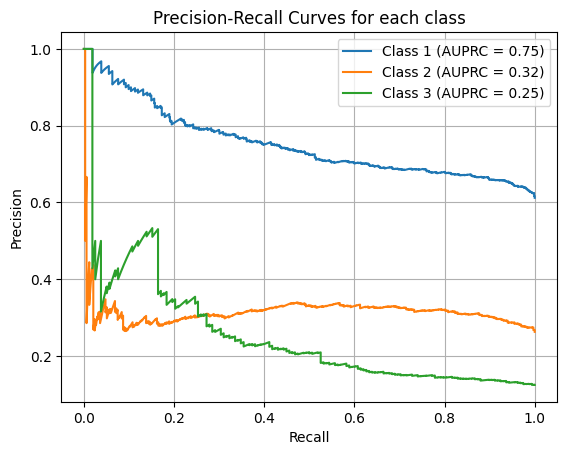


ROC Curves:


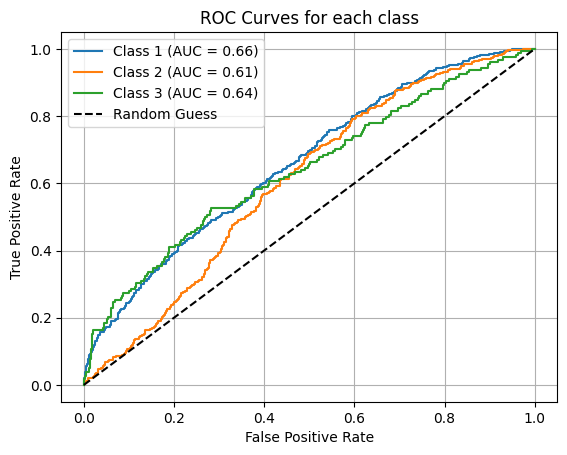


Mean F1 Score: 0.4243
Balanced Accuracy: 0.4209
Average AUPRC: 0.4395

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       775
           1       0.32      0.22      0.26       333
           2       0.33      0.24      0.28       158

    accuracy                           0.58      1266
   macro avg       0.44      0.42      0.42      1266
weighted avg       0.54      0.58      0.55      1266


RESULTS FOR PARAMETER SET 1
Balanced Accuracy for each fold: ['0.4726', '0.3922', '0.5222', '0.5162', '0.4209']
Average Balanced Accuracy across all folds: 0.4648
AUPRC for each fold: ['0.4002', '0.4037', '0.4874', '0.4821', '0.4395']
Average AUPRC across all folds: 0.4426
Best fold (Fold 3) class-wise accuracy: ['0.5307', '0.3225', '0.7133']

PARAMETER SET 2/5
Fold No: 1
Epoch [1/100], Loss: 1.1863, Accuracy: 0.3139
Validation Loss: 1.1256, Validation Accuracy: 0.3466
Epoch [2/100], Loss: 1.1174, Accuracy: 0.3706
Val

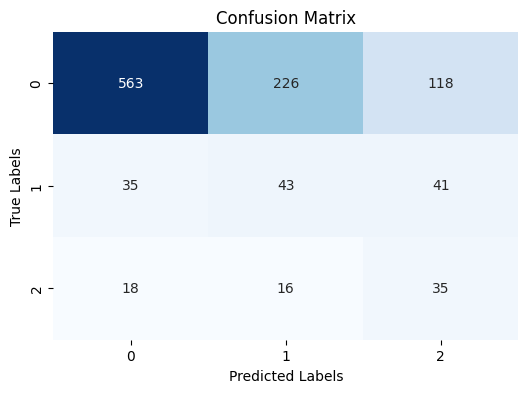


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 563/907 (62.07%)
Class 1: Correct Predictions / Total True Samples = 43/119 (36.13%)
Class 2: Correct Predictions / Total True Samples = 35/69 (50.72%)

Precision-Recall Curves:


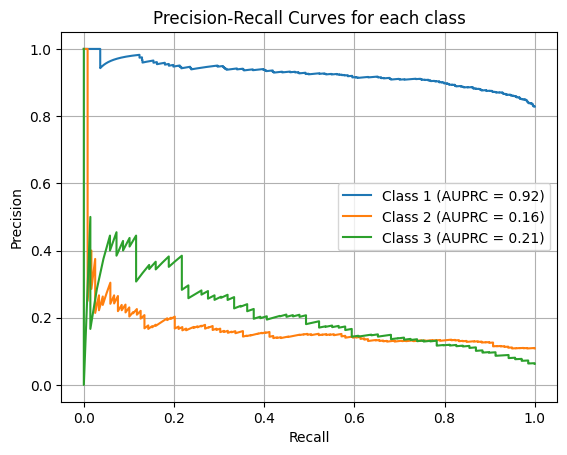


ROC Curves:


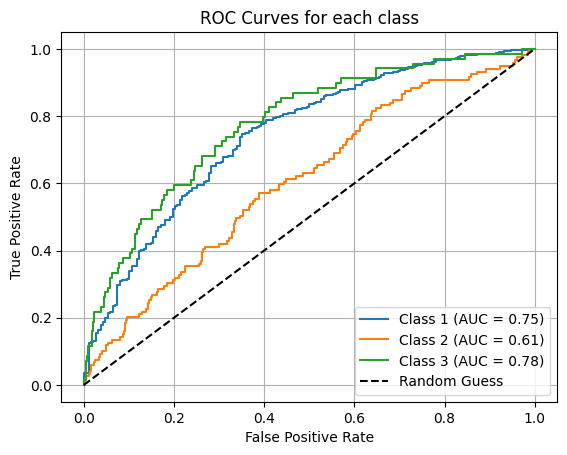


Mean F1 Score: 0.4061
Balanced Accuracy: 0.4964
Average AUPRC: 0.4324

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       907
           1       0.15      0.36      0.21       119
           2       0.18      0.51      0.27        69

    accuracy                           0.59      1095
   macro avg       0.42      0.50      0.41      1095
weighted avg       0.78      0.59      0.65      1095

Fold No: 2
Epoch [1/100], Loss: 1.1756, Accuracy: 0.3357
Validation Loss: 1.0802, Validation Accuracy: 0.3337
Epoch [2/100], Loss: 1.1326, Accuracy: 0.3642
Validation Loss: 1.0486, Validation Accuracy: 0.3286
Epoch [3/100], Loss: 1.1005, Accuracy: 0.3998
Validation Loss: 0.9853, Validation Accuracy: 0.3799
Epoch [4/100], Loss: 1.1076, Accuracy: 0.3975
Validation Loss: 1.3516, Validation Accuracy: 0.4324
Epoch [5/100], Loss: 1.0729, Accuracy: 0.4521
Validation Loss: 1.1419, Validation Accuracy: 0.4352
Epoch [6/100], Los

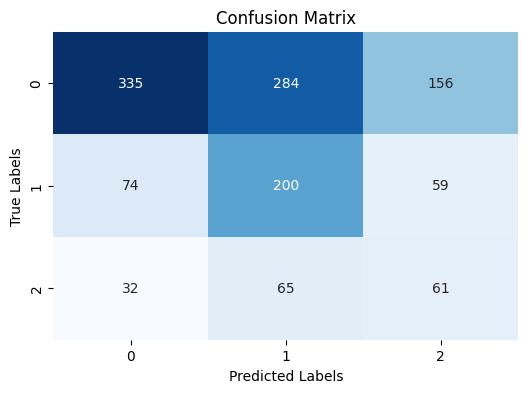


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 335/775 (43.23%)
Class 1: Correct Predictions / Total True Samples = 200/333 (60.06%)
Class 2: Correct Predictions / Total True Samples = 61/158 (38.61%)

Precision-Recall Curves:


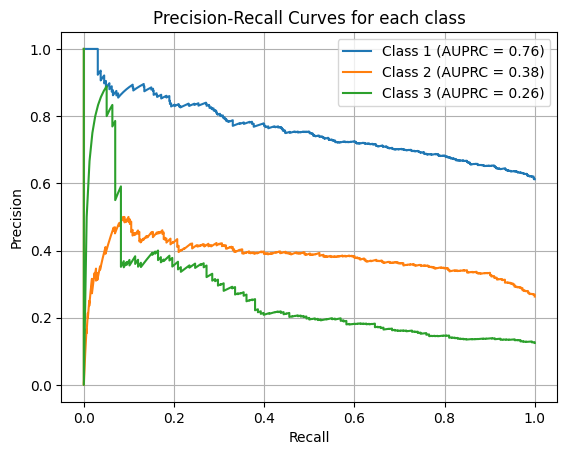


ROC Curves:


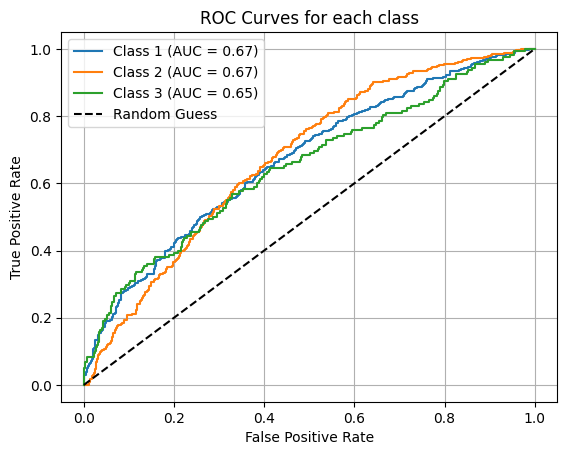


Mean F1 Score: 0.4285
Balanced Accuracy: 0.4730
Average AUPRC: 0.4667

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.43      0.55       775
           1       0.36      0.60      0.45       333
           2       0.22      0.39      0.28       158

    accuracy                           0.47      1266
   macro avg       0.45      0.47      0.43      1266
weighted avg       0.59      0.47      0.49      1266

Fold No: 3
Epoch [1/100], Loss: 1.1973, Accuracy: 0.3254
Validation Loss: 1.1345, Validation Accuracy: 0.4238
Epoch [2/100], Loss: 1.1036, Accuracy: 0.3777
Validation Loss: 1.0331, Validation Accuracy: 0.3921
Epoch [3/100], Loss: 1.1105, Accuracy: 0.3817
Validation Loss: 1.1700, Validation Accuracy: 0.4225
Epoch [4/100], Loss: 1.0890, Accuracy: 0.4053
Validation Loss: 1.0234, Validation Accuracy: 0.3994
Epoch [5/100], Loss: 1.0844, Accuracy: 0.4310
Validation Loss: 1.1636, Validation Accuracy: 0.4434
Epoch [6/100], Los

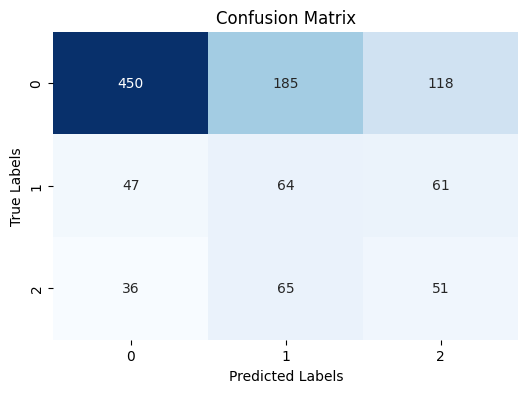


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 450/753 (59.76%)
Class 1: Correct Predictions / Total True Samples = 64/172 (37.21%)
Class 2: Correct Predictions / Total True Samples = 51/152 (33.55%)

Precision-Recall Curves:


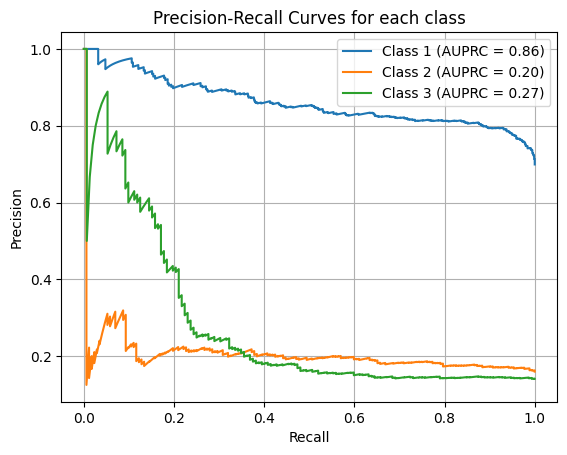


ROC Curves:


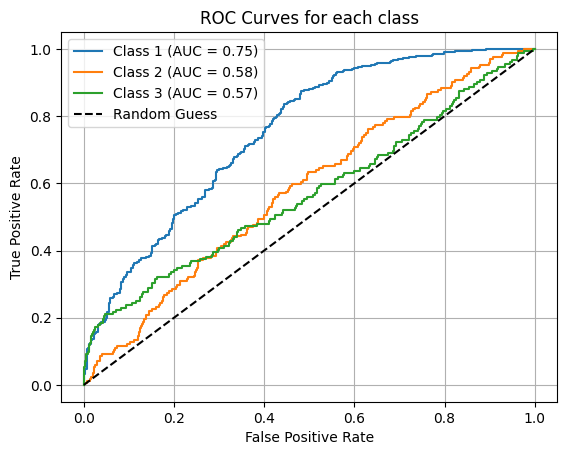


Mean F1 Score: 0.4101
Balanced Accuracy: 0.4351
Average AUPRC: 0.4454

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.60      0.70       753
           1       0.20      0.37      0.26       172
           2       0.22      0.34      0.27       152

    accuracy                           0.52      1077
   macro avg       0.42      0.44      0.41      1077
weighted avg       0.65      0.52      0.57      1077

Fold No: 4
Epoch [1/100], Loss: 1.1779, Accuracy: 0.3537
Validation Loss: 1.1757, Validation Accuracy: 0.3443
Epoch [2/100], Loss: 1.1163, Accuracy: 0.3749
Validation Loss: 1.1241, Validation Accuracy: 0.3252
Epoch [3/100], Loss: 1.0990, Accuracy: 0.4120
Validation Loss: 1.2326, Validation Accuracy: 0.3491
Epoch [4/100], Loss: 1.0765, Accuracy: 0.4324
Validation Loss: 0.9967, Validation Accuracy: 0.3822
Epoch [5/100], Loss: 1.0675, Accuracy: 0.4483
Validation Loss: 1.0501, Validation Accuracy: 0.3647
Epoch [6/100], Los

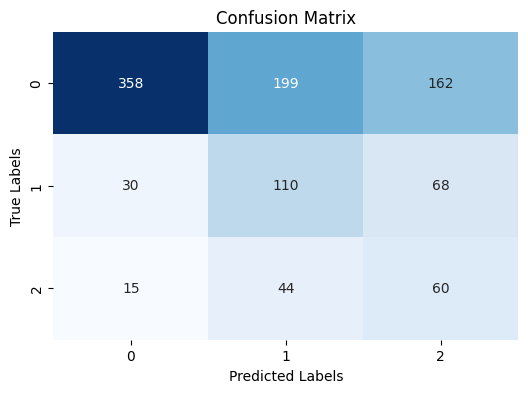


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 358/719 (49.79%)
Class 1: Correct Predictions / Total True Samples = 110/208 (52.88%)
Class 2: Correct Predictions / Total True Samples = 60/119 (50.42%)

Precision-Recall Curves:


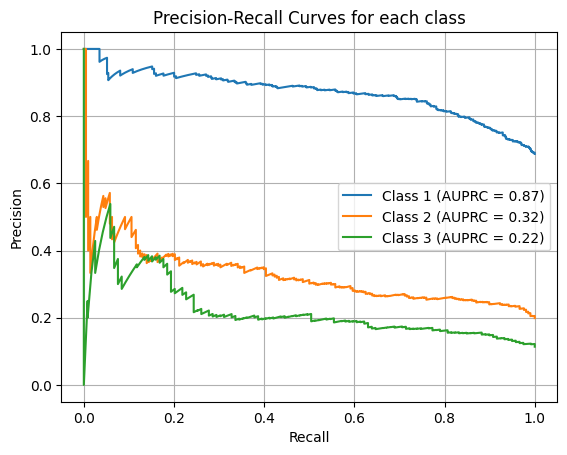


ROC Curves:


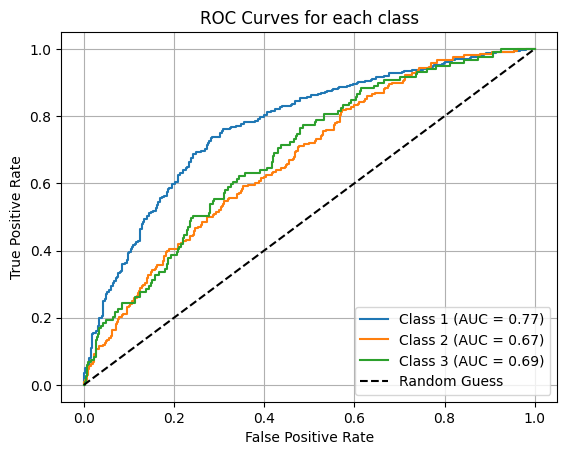


Mean F1 Score: 0.4412
Balanced Accuracy: 0.5103
Average AUPRC: 0.4709

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.50      0.64       719
           1       0.31      0.53      0.39       208
           2       0.21      0.50      0.29       119

    accuracy                           0.50      1046
   macro avg       0.47      0.51      0.44      1046
weighted avg       0.70      0.50      0.55      1046

Fold No: 5
Epoch [1/100], Loss: 1.1812, Accuracy: 0.3333
Validation Loss: 0.9911, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1436, Accuracy: 0.3386
Validation Loss: 1.0945, Validation Accuracy: 0.4172
Epoch [3/100], Loss: 1.1248, Accuracy: 0.3456
Validation Loss: 1.0768, Validation Accuracy: 0.3997
Epoch [4/100], Loss: 1.1164, Accuracy: 0.3544
Validation Loss: 1.0385, Validation Accuracy: 0.3681
Epoch [5/100], Loss: 1.1034, Accuracy: 0.3712
Validation Loss: 1.0764, Validation Accuracy: 0.4069
Epoch [6/100], Los

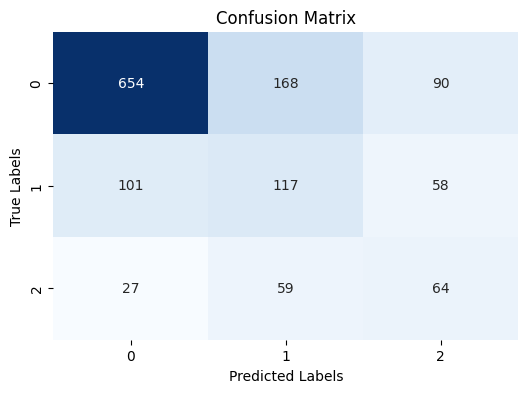


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 654/912 (71.71%)
Class 1: Correct Predictions / Total True Samples = 117/276 (42.39%)
Class 2: Correct Predictions / Total True Samples = 64/150 (42.67%)

Precision-Recall Curves:


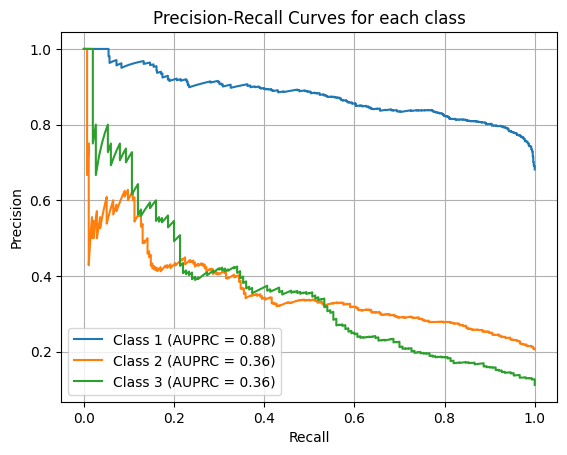


ROC Curves:


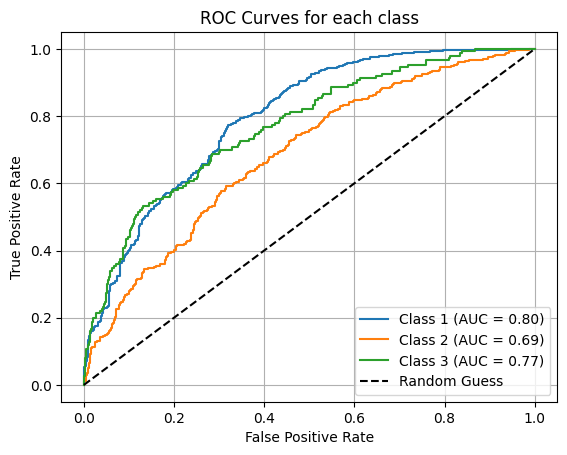


Mean F1 Score: 0.5010
Balanced Accuracy: 0.5226
Average AUPRC: 0.5329

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       912
           1       0.34      0.42      0.38       276
           2       0.30      0.43      0.35       150

    accuracy                           0.62      1338
   macro avg       0.49      0.52      0.50      1338
weighted avg       0.67      0.62      0.64      1338


RESULTS FOR PARAMETER SET 2
Balanced Accuracy for each fold: ['0.4964', '0.4730', '0.4351', '0.5103', '0.5226']
Average Balanced Accuracy across all folds: 0.4875
AUPRC for each fold: ['0.4324', '0.4667', '0.4454', '0.4709', '0.5329']
Average AUPRC across all folds: 0.4697
Best fold (Fold 5) class-wise accuracy: ['0.7171', '0.4239', '0.4267']

PARAMETER SET 3/5
Fold No: 1
Epoch [1/100], Loss: 1.2038, Accuracy: 0.3477
Validation Loss: 1.0195, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1262, Accuracy: 0.3666
Val

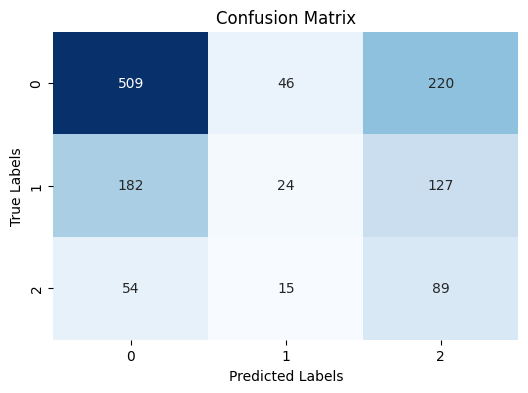


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 509/775 (65.68%)
Class 1: Correct Predictions / Total True Samples = 24/333 (7.21%)
Class 2: Correct Predictions / Total True Samples = 89/158 (56.33%)

Precision-Recall Curves:


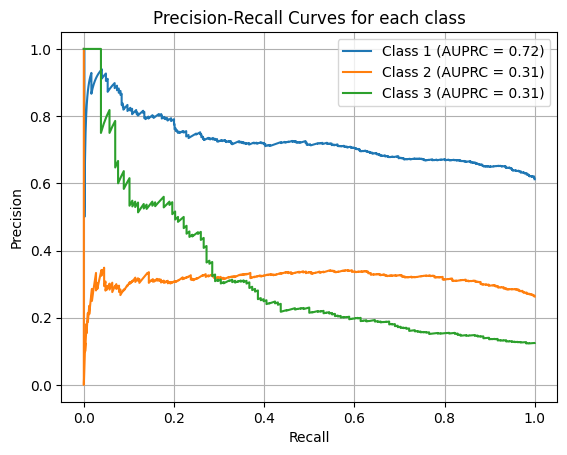


ROC Curves:


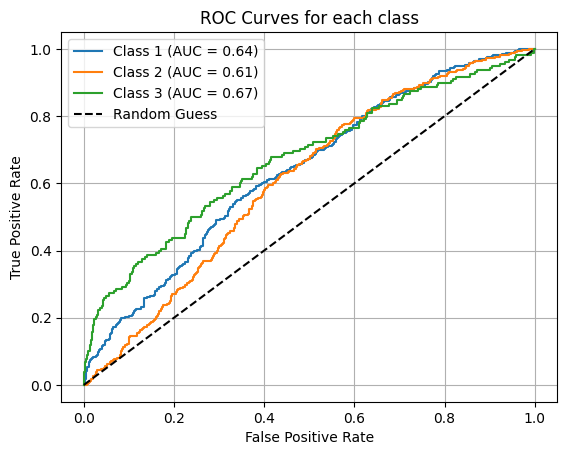


Mean F1 Score: 0.3614
Balanced Accuracy: 0.4307
Average AUPRC: 0.4508

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       775
           1       0.28      0.07      0.11       333
           2       0.20      0.56      0.30       158

    accuracy                           0.49      1266
   macro avg       0.39      0.43      0.36      1266
weighted avg       0.52      0.49      0.48      1266

Fold No: 2
Epoch [1/100], Loss: 1.1924, Accuracy: 0.3157
Validation Loss: 1.1438, Validation Accuracy: 0.3454
Epoch [2/100], Loss: 1.1154, Accuracy: 0.3500
Validation Loss: 1.0310, Validation Accuracy: 0.3401
Epoch [3/100], Loss: 1.1397, Accuracy: 0.3314
Validation Loss: 0.9823, Validation Accuracy: 0.3333
Epoch [4/100], Loss: 1.1030, Accuracy: 0.3961
Validation Loss: 1.1558, Validation Accuracy: 0.3458
Epoch [5/100], Loss: 1.1062, Accuracy: 0.3520
Validation Loss: 1.1098, Validation Accuracy: 0.4538
Epoch [6/100], Los

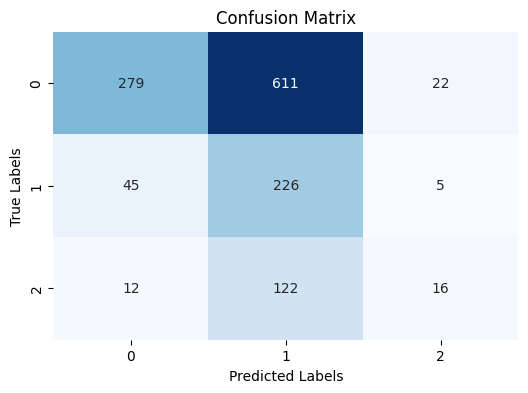


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 279/912 (30.59%)
Class 1: Correct Predictions / Total True Samples = 226/276 (81.88%)
Class 2: Correct Predictions / Total True Samples = 16/150 (10.67%)

Precision-Recall Curves:


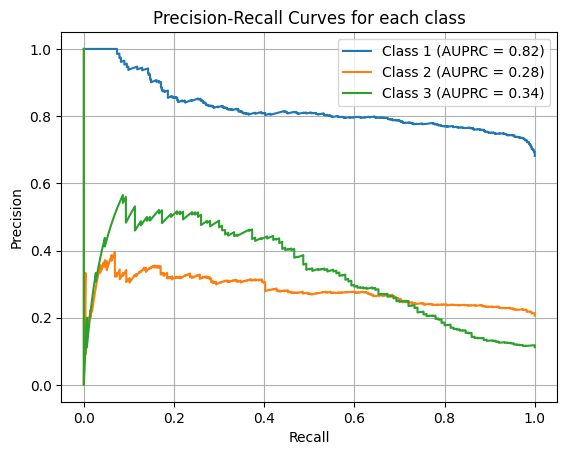


ROC Curves:


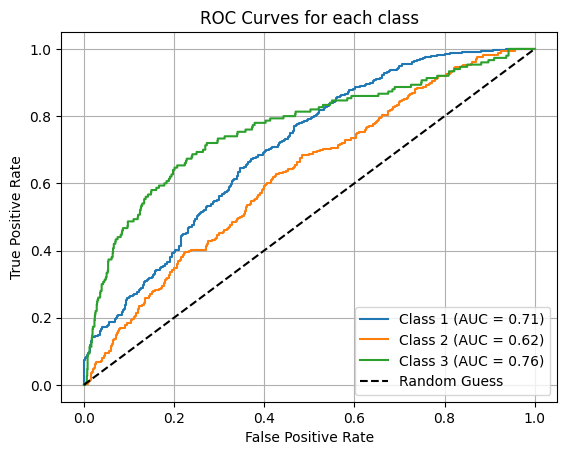


Mean F1 Score: 0.3263
Balanced Accuracy: 0.4105
Average AUPRC: 0.4796

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.31      0.45       912
           1       0.24      0.82      0.37       276
           2       0.37      0.11      0.17       150

    accuracy                           0.39      1338
   macro avg       0.48      0.41      0.33      1338
weighted avg       0.66      0.39      0.40      1338

Fold No: 3
Epoch [1/100], Loss: 1.1869, Accuracy: 0.3545
Validation Loss: 1.2850, Validation Accuracy: 0.3323
Epoch [2/100], Loss: 1.1233, Accuracy: 0.3439
Validation Loss: 1.3913, Validation Accuracy: 0.3738
Epoch [3/100], Loss: 1.1055, Accuracy: 0.3767
Validation Loss: 0.9990, Validation Accuracy: 0.3467
Epoch [4/100], Loss: 1.0967, Accuracy: 0.3834
Validation Loss: 1.0712, Validation Accuracy: 0.5008
Epoch [5/100], Loss: 1.0939, Accuracy: 0.3979
Validation Loss: 0.9929, Validation Accuracy: 0.4375
Epoch [6/100], Los

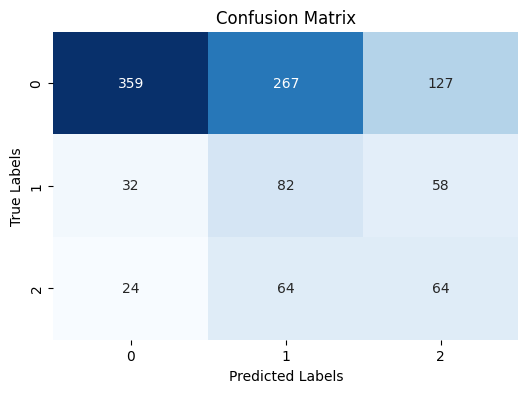


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 359/753 (47.68%)
Class 1: Correct Predictions / Total True Samples = 82/172 (47.67%)
Class 2: Correct Predictions / Total True Samples = 64/152 (42.11%)

Precision-Recall Curves:


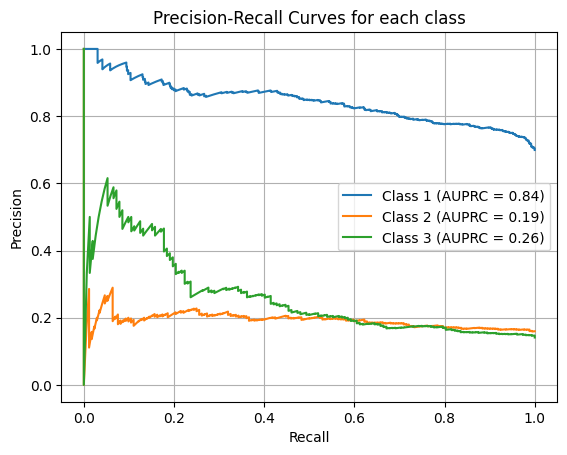


ROC Curves:


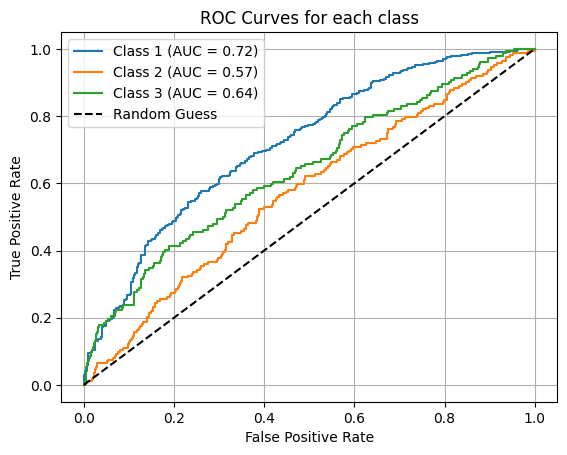


Mean F1 Score: 0.4048
Balanced Accuracy: 0.4582
Average AUPRC: 0.4313

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.48      0.61       753
           1       0.20      0.48      0.28       172
           2       0.26      0.42      0.32       152

    accuracy                           0.47      1077
   macro avg       0.44      0.46      0.40      1077
weighted avg       0.67      0.47      0.52      1077

Fold No: 4
Epoch [1/100], Loss: 1.1764, Accuracy: 0.3489
Validation Loss: 1.3415, Validation Accuracy: 0.3002
Epoch [2/100], Loss: 1.1105, Accuracy: 0.3685
Validation Loss: 1.0950, Validation Accuracy: 0.3192
Epoch [3/100], Loss: 1.1037, Accuracy: 0.3973
Validation Loss: 1.2560, Validation Accuracy: 0.3239
Epoch [4/100], Loss: 1.0841, Accuracy: 0.4208
Validation Loss: 0.9832, Validation Accuracy: 0.3541
Epoch [5/100], Loss: 1.0660, Accuracy: 0.4481
Validation Loss: 1.1606, Validation Accuracy: 0.3636
Epoch [6/100], Los

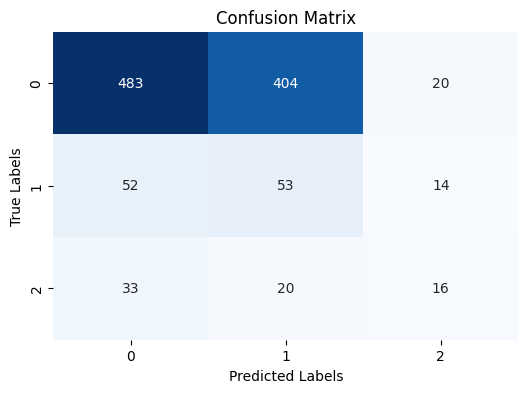


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 483/907 (53.25%)
Class 1: Correct Predictions / Total True Samples = 53/119 (44.54%)
Class 2: Correct Predictions / Total True Samples = 16/69 (23.19%)

Precision-Recall Curves:


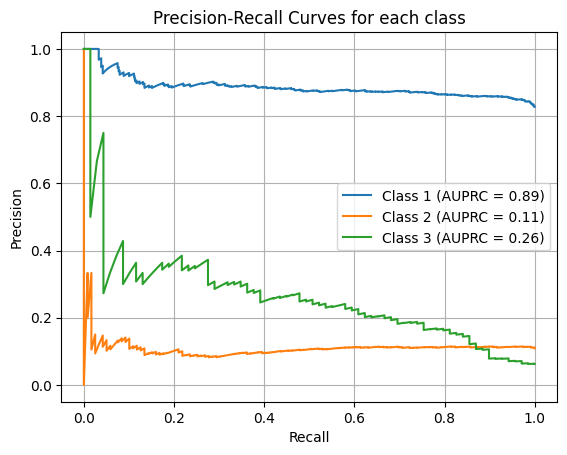


ROC Curves:


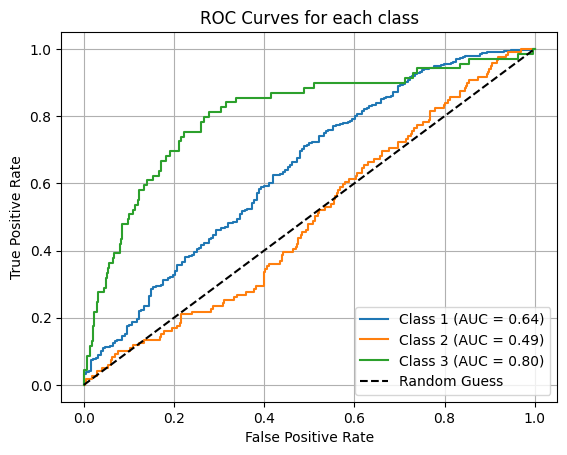


Mean F1 Score: 0.3672
Balanced Accuracy: 0.4033
Average AUPRC: 0.4171

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       907
           1       0.11      0.45      0.18       119
           2       0.32      0.23      0.27        69

    accuracy                           0.50      1095
   macro avg       0.43      0.40      0.37      1095
weighted avg       0.74      0.50      0.58      1095

Fold No: 5
Epoch [1/100], Loss: 1.1670, Accuracy: 0.3341
Validation Loss: 1.3045, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1101, Accuracy: 0.3739
Validation Loss: 1.0945, Validation Accuracy: 0.3599
Epoch [3/100], Loss: 1.1080, Accuracy: 0.3732
Validation Loss: 1.1847, Validation Accuracy: 0.4264
Epoch [4/100], Loss: 1.1219, Accuracy: 0.3435
Validation Loss: 1.1935, Validation Accuracy: 0.3604
Epoch [5/100], Loss: 1.0847, Accuracy: 0.4152
Validation Loss: 1.0749, Validation Accuracy: 0.4312
Epoch [6/100], Los

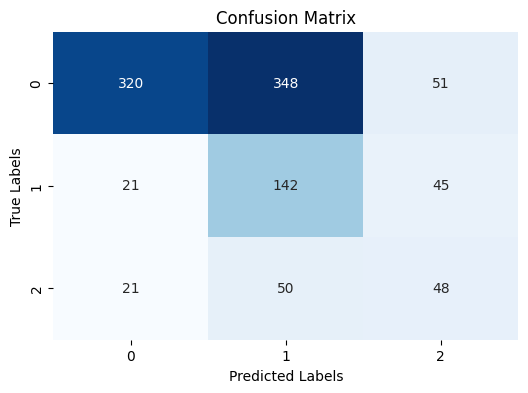


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 320/719 (44.51%)
Class 1: Correct Predictions / Total True Samples = 142/208 (68.27%)
Class 2: Correct Predictions / Total True Samples = 48/119 (40.34%)

Precision-Recall Curves:


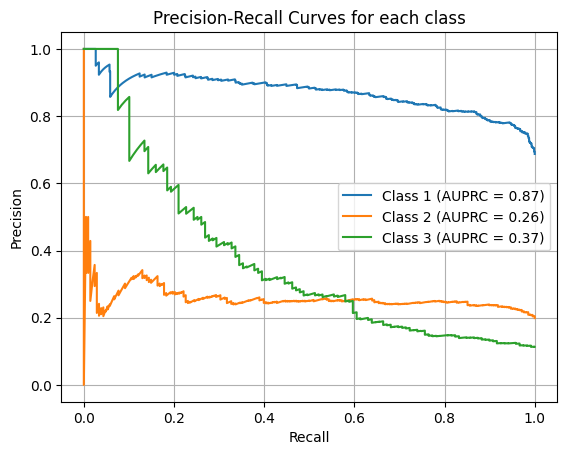


ROC Curves:


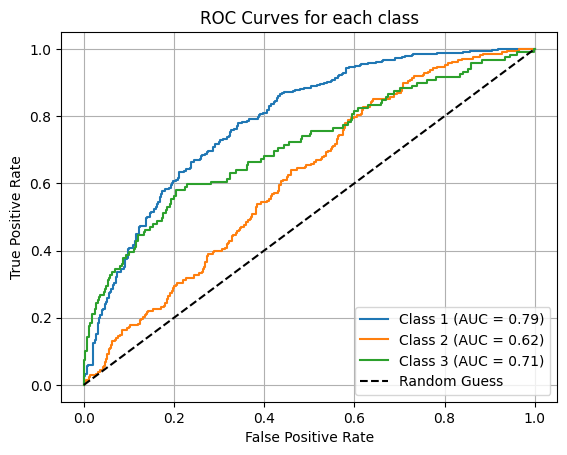


Mean F1 Score: 0.4456
Balanced Accuracy: 0.5104
Average AUPRC: 0.4973

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.59       719
           1       0.26      0.68      0.38       208
           2       0.33      0.40      0.37       119

    accuracy                           0.49      1046
   macro avg       0.49      0.51      0.45      1046
weighted avg       0.70      0.49      0.52      1046


RESULTS FOR PARAMETER SET 3
Balanced Accuracy for each fold: ['0.4307', '0.4105', '0.4582', '0.4033', '0.5104']
Average Balanced Accuracy across all folds: 0.4426
AUPRC for each fold: ['0.4508', '0.4796', '0.4313', '0.4171', '0.4973']
Average AUPRC across all folds: 0.4552
Best fold (Fold 5) class-wise accuracy: ['0.4451', '0.6827', '0.4034']

PARAMETER SET 4/5
Fold No: 1
Epoch [1/100], Loss: 1.3062, Accuracy: 0.3333
Validation Loss: 1.0072, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1342, Accuracy: 0.3698
Val

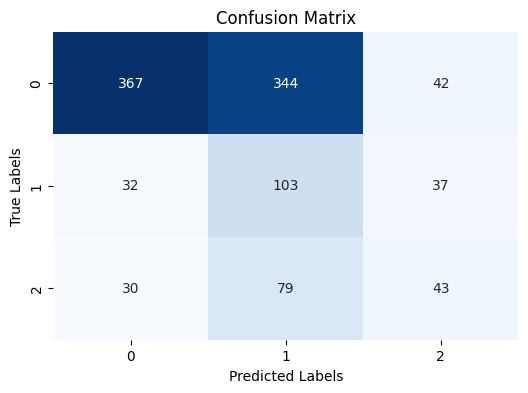


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 367/753 (48.74%)
Class 1: Correct Predictions / Total True Samples = 103/172 (59.88%)
Class 2: Correct Predictions / Total True Samples = 43/152 (28.29%)

Precision-Recall Curves:


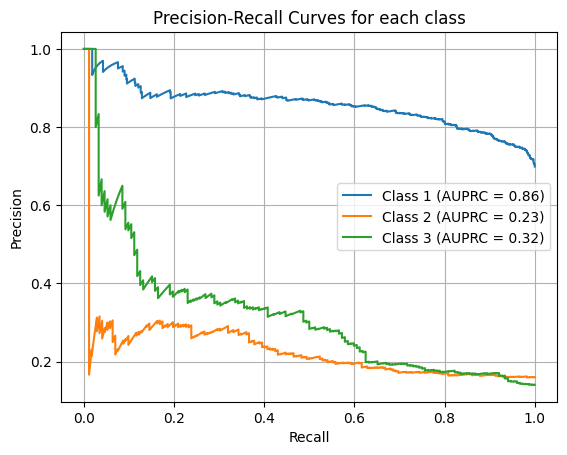


ROC Curves:


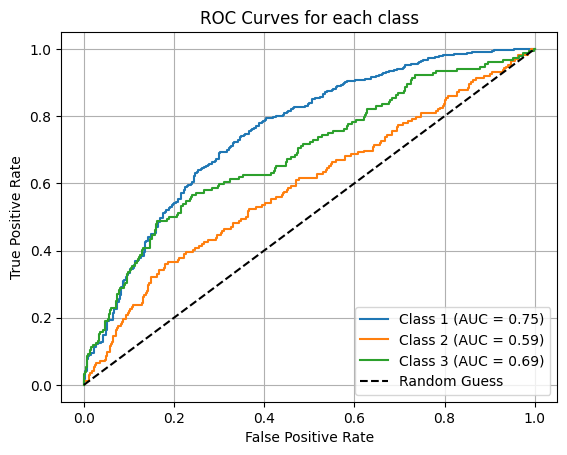


Mean F1 Score: 0.4100
Balanced Accuracy: 0.4564
Average AUPRC: 0.4672

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.49      0.62       753
           1       0.20      0.60      0.30       172
           2       0.35      0.28      0.31       152

    accuracy                           0.48      1077
   macro avg       0.47      0.46      0.41      1077
weighted avg       0.68      0.48      0.53      1077

Fold No: 2
Epoch [1/100], Loss: 1.2579, Accuracy: 0.3382
Validation Loss: 1.3126, Validation Accuracy: 0.3336
Epoch [2/100], Loss: 1.1207, Accuracy: 0.3459
Validation Loss: 1.0685, Validation Accuracy: 0.3759
Epoch [3/100], Loss: 1.1266, Accuracy: 0.3593
Validation Loss: 1.3144, Validation Accuracy: 0.3609
Epoch [4/100], Loss: 1.1194, Accuracy: 0.4066
Validation Loss: 1.0136, Validation Accuracy: 0.4248
Epoch [5/100], Loss: 1.1117, Accuracy: 0.3767
Validation Loss: 1.1621, Validation Accuracy: 0.3367
Epoch [6/100], Los

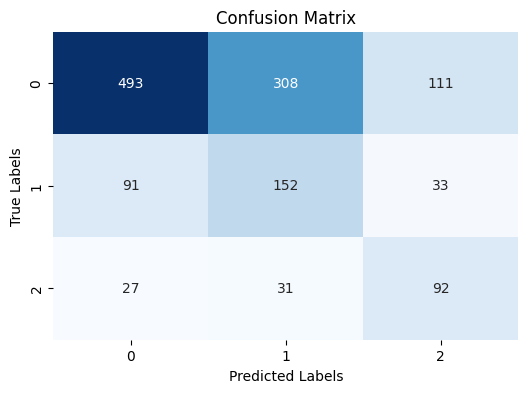


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 493/912 (54.06%)
Class 1: Correct Predictions / Total True Samples = 152/276 (55.07%)
Class 2: Correct Predictions / Total True Samples = 92/150 (61.33%)

Precision-Recall Curves:


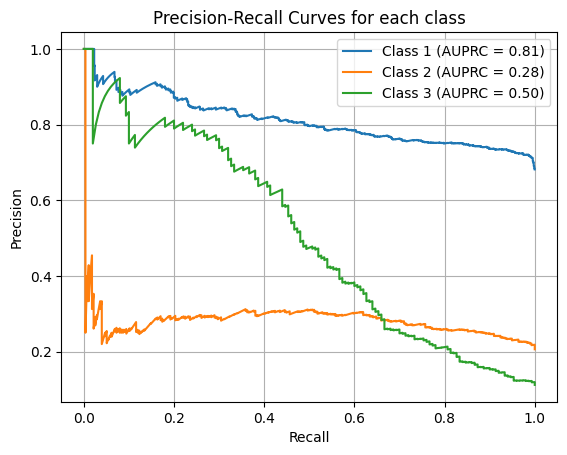


ROC Curves:


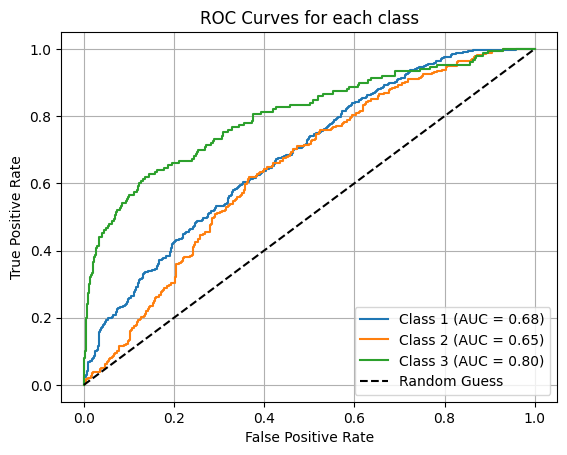


Mean F1 Score: 0.5068
Balanced Accuracy: 0.5682
Average AUPRC: 0.5305

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       912
           1       0.31      0.55      0.40       276
           2       0.39      0.61      0.48       150

    accuracy                           0.55      1338
   macro avg       0.50      0.57      0.51      1338
weighted avg       0.66      0.55      0.58      1338

Fold No: 3
Epoch [1/100], Loss: 1.2770, Accuracy: 0.3676
Validation Loss: 1.1041, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1342, Accuracy: 0.3606
Validation Loss: 1.0034, Validation Accuracy: 0.3253
Epoch [3/100], Loss: 1.1241, Accuracy: 0.3694
Validation Loss: 1.3341, Validation Accuracy: 0.4512
Epoch [4/100], Loss: 1.1269, Accuracy: 0.3456
Validation Loss: 0.9614, Validation Accuracy: 0.3275
Epoch [5/100], Loss: 1.1335, Accuracy: 0.3544
Validation Loss: 0.9714, Validation Accuracy: 0.3333
Epoch [6/100], Los

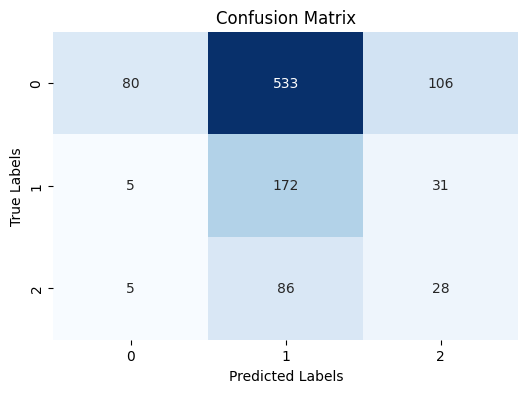


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 80/719 (11.13%)
Class 1: Correct Predictions / Total True Samples = 172/208 (82.69%)
Class 2: Correct Predictions / Total True Samples = 28/119 (23.53%)

Precision-Recall Curves:


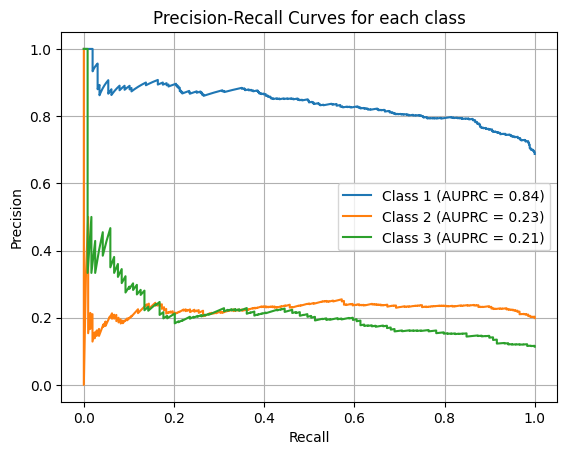


ROC Curves:


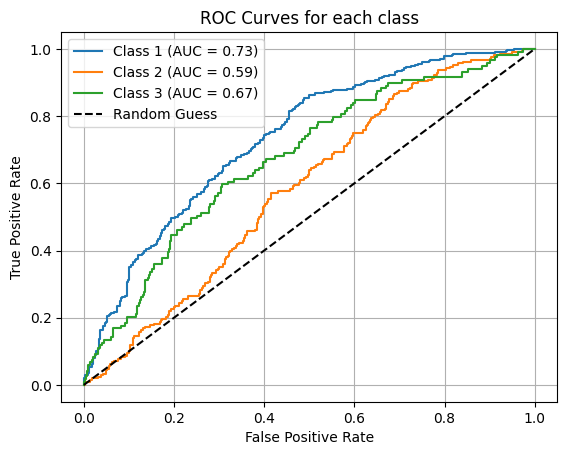


Mean F1 Score: 0.2464
Balanced Accuracy: 0.3912
Average AUPRC: 0.4251

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.11      0.20       719
           1       0.22      0.83      0.34       208
           2       0.17      0.24      0.20       119

    accuracy                           0.27      1046
   macro avg       0.43      0.39      0.25      1046
weighted avg       0.67      0.27      0.23      1046

Fold No: 4
Epoch [1/100], Loss: 1.2446, Accuracy: 0.3442
Validation Loss: 0.9730, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1396, Accuracy: 0.3551
Validation Loss: 1.1532, Validation Accuracy: 0.3555
Epoch [3/100], Loss: 1.1144, Accuracy: 0.3920
Validation Loss: 1.0375, Validation Accuracy: 0.4370
Epoch [4/100], Loss: 1.0963, Accuracy: 0.4007
Validation Loss: 1.2079, Validation Accuracy: 0.3885
Epoch [5/100], Loss: 1.0732, Accuracy: 0.4377
Validation Loss: 1.1013, Validation Accuracy: 0.4494
Epoch [6/100], Los

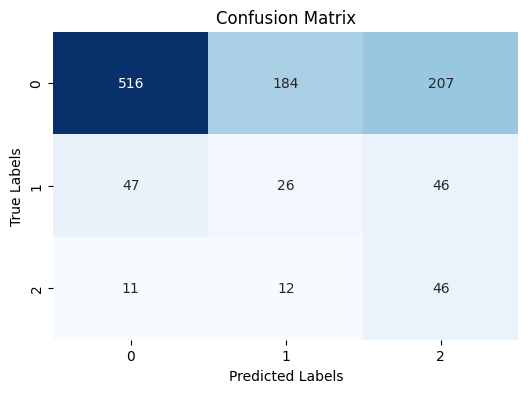


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 516/907 (56.89%)
Class 1: Correct Predictions / Total True Samples = 26/119 (21.85%)
Class 2: Correct Predictions / Total True Samples = 46/69 (66.67%)

Precision-Recall Curves:


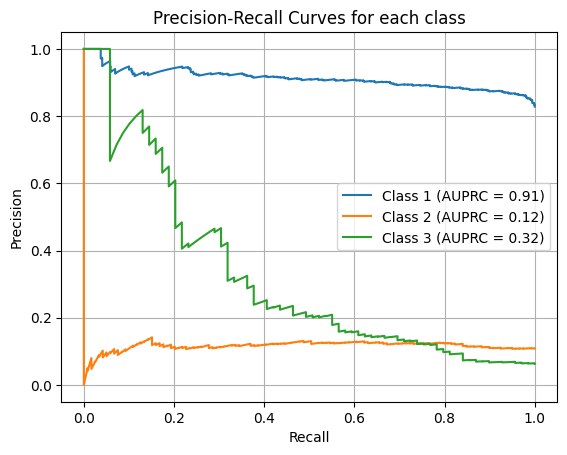


ROC Curves:


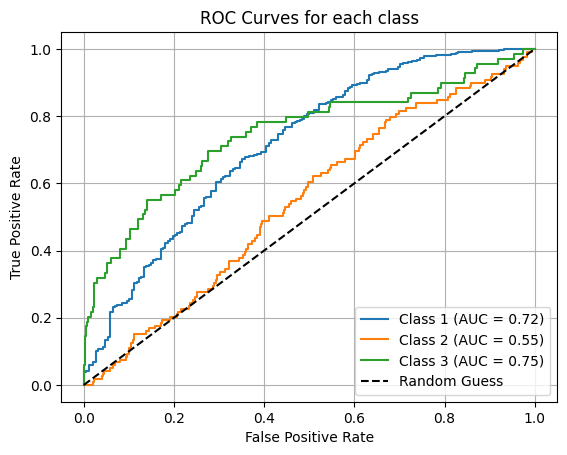


Mean F1 Score: 0.3664
Balanced Accuracy: 0.4847
Average AUPRC: 0.4488

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       907
           1       0.12      0.22      0.15       119
           2       0.15      0.67      0.25        69

    accuracy                           0.54      1095
   macro avg       0.39      0.48      0.37      1095
weighted avg       0.77      0.54      0.61      1095

Fold No: 5
Epoch [1/100], Loss: 1.2960, Accuracy: 0.3531
Validation Loss: 1.1074, Validation Accuracy: 0.3362
Epoch [2/100], Loss: 1.1280, Accuracy: 0.3413
Validation Loss: 1.0305, Validation Accuracy: 0.3374
Epoch [3/100], Loss: 1.1415, Accuracy: 0.3310
Validation Loss: 0.9235, Validation Accuracy: 0.3363
Epoch [4/100], Loss: 1.0991, Accuracy: 0.3840
Validation Loss: 1.0146, Validation Accuracy: 0.3470
Epoch [5/100], Loss: 1.1156, Accuracy: 0.3919
Validation Loss: 1.0464, Validation Accuracy: 0.4717
Epoch [6/100], Los

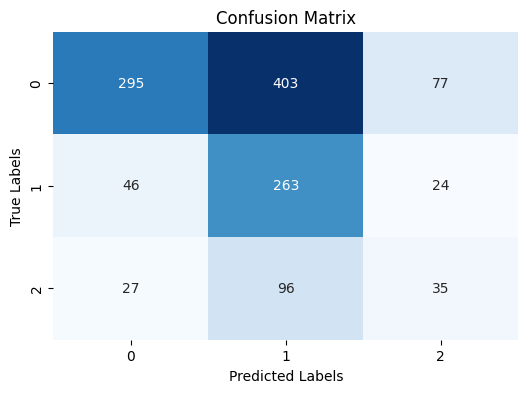


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 295/775 (38.06%)
Class 1: Correct Predictions / Total True Samples = 263/333 (78.98%)
Class 2: Correct Predictions / Total True Samples = 35/158 (22.15%)

Precision-Recall Curves:


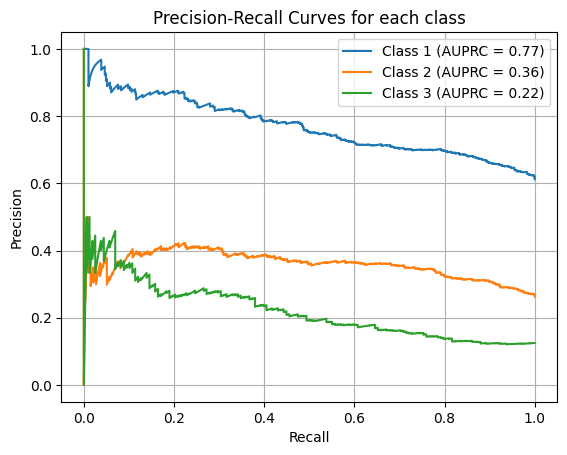


ROC Curves:


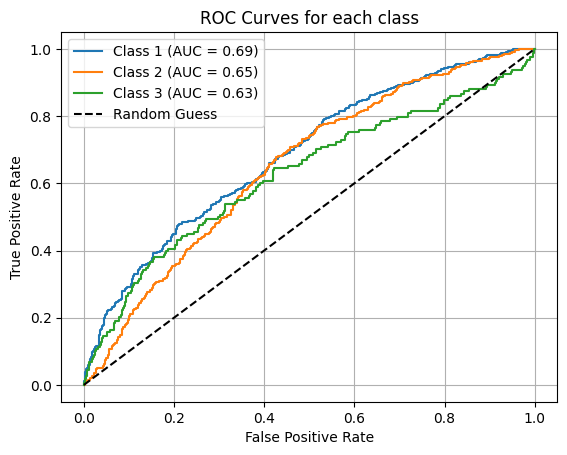


Mean F1 Score: 0.4115
Balanced Accuracy: 0.4640
Average AUPRC: 0.4488

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.38      0.52       775
           1       0.35      0.79      0.48       333
           2       0.26      0.22      0.24       158

    accuracy                           0.47      1266
   macro avg       0.47      0.46      0.41      1266
weighted avg       0.61      0.47      0.47      1266


RESULTS FOR PARAMETER SET 4
Balanced Accuracy for each fold: ['0.4564', '0.5682', '0.3912', '0.4847', '0.4640']
Average Balanced Accuracy across all folds: 0.4729
AUPRC for each fold: ['0.4672', '0.5305', '0.4251', '0.4488', '0.4488']
Average AUPRC across all folds: 0.4641
Best fold (Fold 2) class-wise accuracy: ['0.5406', '0.5507', '0.6133']

SUMMARY OF ALL PARAMETER SETS

Parameter Set 1:
  Mean Balanced Accuracy: 0.4648
  Mean AUPRC: 0.4426
  Best Fold: 3
  Best Fold Class Accuracies: ['0.5307', '0.3225', '0.7133']

In [9]:
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc


best_hyperparameters = [
    #{"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 3.4743437814152234, "drop_rate": 0.2196553774120712, "attn_drop_rate": 0.11422186698873736, "drop_path_rate": 0.1957961691453823, "learning_rate": 2.979913486005799e-05, "weight_decay": 1.7617692096276903e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 33, Accuracy: 0.4965
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [3, 6, 12, 24], "window_size": 14, "mlp_ratio": 3.137013405247577, "drop_rate": 0.30093290603784567, "attn_drop_rate": 0.3761388504319039, "drop_path_rate": 0.4065903983467871, "learning_rate": 3.7110385234002754e-05, "weight_decay": 4.897805083879679e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 60, Accuracy: 0.4853
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [3, 6, 12, 24], "window_size": 7, "mlp_ratio": 3.7769519132922493, "drop_rate": 0.1984519652418958, "attn_drop_rate": 0.05870537587566105, "drop_path_rate": 0.2552739917649969, "learning_rate": 2.8978023404587194e-05, "weight_decay": 9.696677140914609e-06, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 35, Accuracy: 0.4848
    {"embed_dim": 96, "depths": [2, 2, 18, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 3.1666081222689586, "drop_rate": 0.2648875737075289, "attn_drop_rate": 0.4973540712764486, "drop_path_rate": 0.1749537158109743, "learning_rate": 3.3083402954755556e-05, "weight_decay": 0.0008442710030805027, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1}, # Trial 15, Accuracy: 0.4820
    {"embed_dim": 128, "depths": [2, 2, 6, 2], "num_heads": [4, 8, 16, 32], "window_size": 14, "mlp_ratio": 2.7289717929028736, "drop_rate": 0.25507221573652655, "attn_drop_rate": 0.020952162053520067, "drop_path_rate": 0.09856910389799566, "learning_rate": 8.406640337210993e-05, "weight_decay": 1.5739588434672217e-05, "batch_size": 16, "optimizer": "Adam", "label_smoothing": 0.2, "factor": 1} # Trial 49, Accuracy: 0.4796
]

# Store results for all parameter sets
all_results = []

for parameter in range(len(best_hyperparameters)):
    
    #clear the GPU cache
    torch.cuda.empty_cache()

    print(f"\n{'='*60}")
    print(f"PARAMETER SET {parameter + 1}/5")
    print(f"{'='*60}")

    # Load the best hyperparameters for the current trial
    
    hyperparameters = best_hyperparameters[parameter]
    # Unpack hyperparameters
    config = {
        "embed_dim": hyperparameters["embed_dim"],
        "depths": hyperparameters["depths"],
        "num_heads": hyperparameters["num_heads"],
        "window_size": hyperparameters["window_size"],
        "mlp_ratio": hyperparameters["mlp_ratio"],
        "drop_rate": hyperparameters["drop_rate"],
        "attn_drop_rate": hyperparameters["attn_drop_rate"],
        "drop_path_rate": hyperparameters["drop_path_rate"],
    }
    
    learning_rate = hyperparameters["learning_rate"]
    weight_decay = hyperparameters["weight_decay"]
    batch_size = hyperparameters["batch_size"]
    optimizer = hyperparameters["optimizer"]
    label_smoothing = hyperparameters["label_smoothing"]
    factor = hyperparameters["factor"]

    # Fold indices and other configurations
    num_folds = 5
    fold_indices = np.random.permutation(np.arange(num_folds))
    val_fold_indices = np.roll(fold_indices, 1)

    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Model and training configurations
    num_classes = 3
    epochs = 100
    input_shape = (3,224,224)  # (channels, height, width)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    #set random seed for reproducibility
    torch.manual_seed(42)
    debug_mode_flag = False
    np.random.seed(42)
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = model = SwinTransformer(
            img_size=224,
            patch_size=4,
            in_chans=3,
            num_classes=num_classes,
            embed_dim=config['embed_dim'],
            depths=config['depths'],
            num_heads=config['num_heads'],
            window_size=config['window_size'],
            mlp_ratio=config['mlp_ratio'],
            qkv_bias=True,
            drop_rate=config['drop_rate'],
            attn_drop_rate=config['attn_drop_rate'],
            drop_path_rate=config['drop_path_rate'],
            norm_layer=nn.LayerNorm
        ).to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            # val_data = eeg_folds[val_fold]
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        # test_data = eeg_folds[test_fold]
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        # Calculate class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        class_accuracies = [class_report[str(i)]['recall'] for i in range(num_classes)]
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
        test_auprcs = []
        for class_idx in range(num_classes):
            precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
            auprc = auc(recall, precision)
            test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]
    
    # Print results for current parameter set
    print(f"\n{'='*50}")
    print(f"RESULTS FOR PARAMETER SET {parameter + 1}")
    print(f"{'='*50}")
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_accuracies]}')
    
    # Store results
    result_dict = {
        'parameter_set': parameter + 1,
        'fold_balanced_accuracies': fold_accuracies,
        'mean_balanced_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'mean_auprc': average_auprc,
        'best_fold_idx': best_fold_idx + 1,
        'best_fold_class_accuracies': best_fold_class_accuracies
    }
    all_results.append(result_dict)

# Print summary of all results
print(f"\n{'='*80}")
print("SUMMARY OF ALL PARAMETER SETS")
print(f"{'='*80}")

for i, result in enumerate(all_results):
    print(f"\nParameter Set {result['parameter_set']}:")
    print(f"  Mean Balanced Accuracy: {result['mean_balanced_accuracy']:.4f}")
    print(f"  Mean AUPRC: {result['mean_auprc']:.4f}")
    print(f"  Best Fold: {result['best_fold_idx']}")
    print(f"  Best Fold Class Accuracies: {[f'{acc:.4f}' for acc in result['best_fold_class_accuracies']]}")

# Find overall best parameter set
best_param_set_idx = np.argmax([result['mean_balanced_accuracy'] for result in all_results])
print(f"\nBest Parameter Set: {best_param_set_idx + 1} with Mean Balanced Accuracy: {all_results[best_param_set_idx]['mean_balanced_accuracy']:.4f}")
